# Zomato Restaurant Review Analysis

## 1. Introduction

An NLP and EDA-based project analyzing customer reviews from Zomato Cafe listings to extract sentiment, insights, and patterns that help understand customer experience.

### 1.1 Objective

* Load and preprocess Zomato review data.
* Perform Exploratory Data Analysis (EDA) on review text and associated metadata (ratings, restaurant names, etc.).
* Apply Natural Language Processing (NLP) techniques for text cleaning and feature engineering.
* Conduct sentiment analysis to classify reviews as positive, negative, or neutral.
* Visualize findings to present actionable insights.

### 1.2 🛠️ Technologies Used
- Python
- Pandas, NumPy
- NLTK, TextBlob
- Seaborn, Matplotlib
- WordCloud

## 2. Dataset Loading and Initial Exploration

### - **Source**: [Kaggle - Zomato Cafe Reviews](https://www.kaggle.com/datasets/juhibhojani/zomato-cafe-reviews)
- **Rows**: 775
- **Columns**:
  - `Name`: Restaurant Name
  - `Overall_Rating`: Customer rating
  - `Cuisine`: Type of cuisines offered
  - `Rate for two`: Price for two people
  - `City`: City of the cafe
  - `Review`: Text review by the customer

First, we'll load the necessary libraries and dataset to get a preliminary understanding of its structure, columns, and data types.

### 2.1 Import Necessary Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...


True

### 2.2 Load the dataset

In [2]:
try:
    data_set = pd.read_csv('dataset/zomato_cafe_reviews.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error! File not found")

Dataset loaded successfully.


### 2.3 Inspecting the Dataset

In [3]:
data_set.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [5]:
data_set.tail()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
770,770,The Food Garden,-,"Cafe, Salad, Healthy Food, Fast Food, North In...",850,chandigarh,The taste is good but the quantity is low as c...
771,771,The Food Garden,-,"Cafe, Salad, Healthy Food, Fast Food, North In...",850,chandigarh,pathetic food rejected
772,772,The Food Garden,-,"Cafe, Salad, Healthy Food, Fast Food, North In...",850,chandigarh,"thupka pack on cold drink packing, taste less,..."
773,773,The Food Garden,-,"Cafe, Salad, Healthy Food, Fast Food, North In...",850,chandigarh,very fast dilver
774,774,The Food Garden,-,"Cafe, Salad, Healthy Food, Fast Food, North In...",850,chandigarh,Tried their Hummus and Pita bread today. Didn'...


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           775 non-null    int64 
 1   Name            775 non-null    object
 2   Overall_Rating  775 non-null    object
 3   Cuisine         775 non-null    object
 4   Rate for two    775 non-null    object
 5   City            775 non-null    object
 6   Review          775 non-null    object
dtypes: int64(1), object(6)
memory usage: 42.5+ KB


In [5]:
data_set.describe()

,Index
count,775.00000
mean,387.00000
std,223.86752
min,0.00000
25%,193.50000
50%,387.00000
75%,580.50000
max,774.00000


In [6]:
data_set.describe(include='all')

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
count,775.00000,775,775,775,775,775,775
unique,NaN,299,25,292,28,10,771
top,NaN,The Chocolate Room,3.9,"Cafe, Fast Food",500,bangalore,good
freq,NaN,11,92,11,118,166,4
mean,387.00000,NaN,NaN,NaN,NaN,NaN,NaN
std,223.86752,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,193.50000,NaN,NaN,NaN,NaN,NaN,NaN
50%,387.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,580.50000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_set.isnull().sum()

Index             0
Name              0
Overall_Rating    0
Cuisine           0
Rate for two      0
City              0
Review            0
dtype: int64

In [8]:
data_set.duplicated().sum()

np.int64(0)

## 🧹 3: Data Cleaning
- Handle missing or invalid entries in the `Overall_Rating` column (replace `-` with NaN).
- Clean the text in the `Review` column using:
  - Lowercasing
  - Removing punctuation/numbers
  - Stopword removal
  - Lemmatization

In [13]:
data_set['Overall_Rating'] = data_set['Overall_Rating'].replace('-', np.nan)
#If Pandas encounters any other value that it cannot convert to a number, it will also turn it to NaN using coerce
data_set['Overall_Rating'] = pd.to_numeric(data_set['Overall_Rating'], errors='coerce')

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [15]:
def clean_review(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove numbers and special characters
    text = text.lower()  # lowercase
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatization
    return ' '.join(tokens)

data_set['Clean_Review'] = data_set['Review'].apply(clean_review)

## 📊 Step 4: Exploratory Data Analysis
- Visualize distribution of ratings.
- Analyze review lengths and review counts per city or restaurant.
- Create word clouds of the most frequent terms.

### 4.1 Rating distribution

C:\Users\shrey\AppData\Local\Temp\ipykernel_12064\793982698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_set['Overall_Rating'].dropna(), palette='viridis')


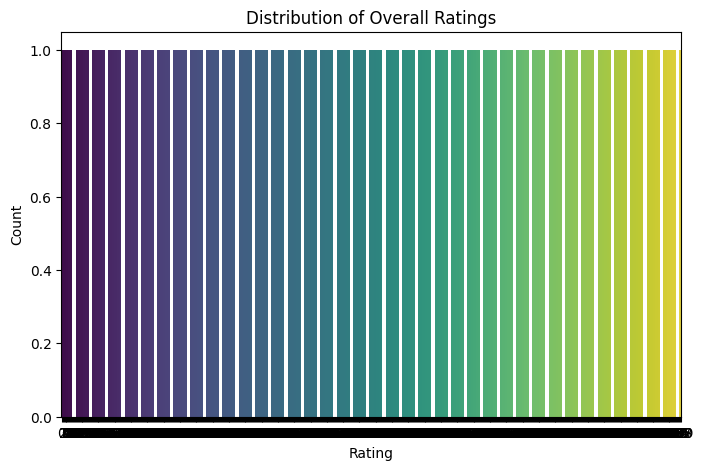

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data_set['Overall_Rating'].dropna(), palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### 4.2 Most frequent words in reviews

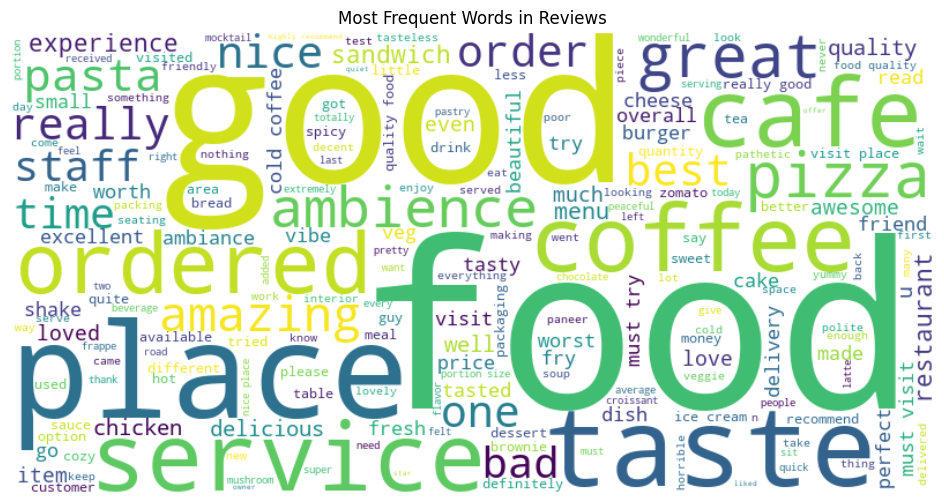

In [17]:
all_words = ' '.join(data_set['Clean_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

### 4.3 Review length distribution

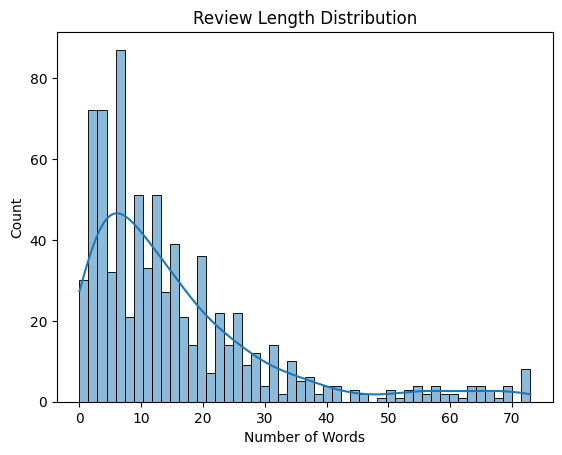

In [18]:
data_set['Review_Length'] = data_set['Clean_Review'].apply(lambda x: len(x.split()))
sns.histplot(data_set['Review_Length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.show()

## 5. Sentiment Analysis
Use `TextBlob` to compute sentiment polarity for each review:
- Positive if polarity > 0.1
- Negative if polarity < -0.1
- Neutral otherwise

Visualize sentiment distribution and compare sentiment vs rating.

C:\Users\shrey\AppData\Local\Temp\ipykernel_12064\3690417034.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_set['Sentiment'], palette='coolwarm')


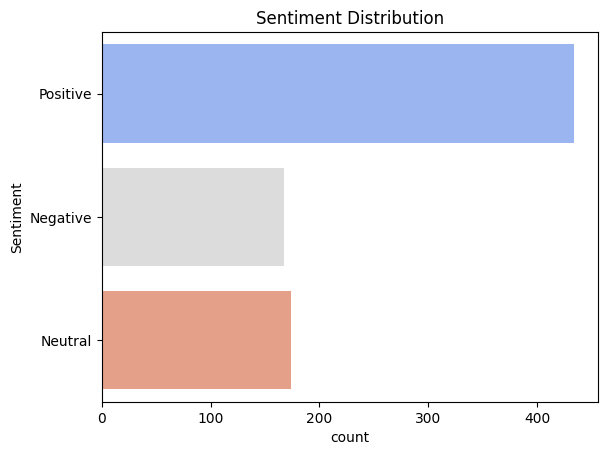

In [19]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

data_set['Sentiment'] = data_set['Clean_Review'].apply(get_sentiment)

sns.countplot(data_set['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


## 🔍 Key Insights
- Most reviews are positive, indicating general customer satisfaction.

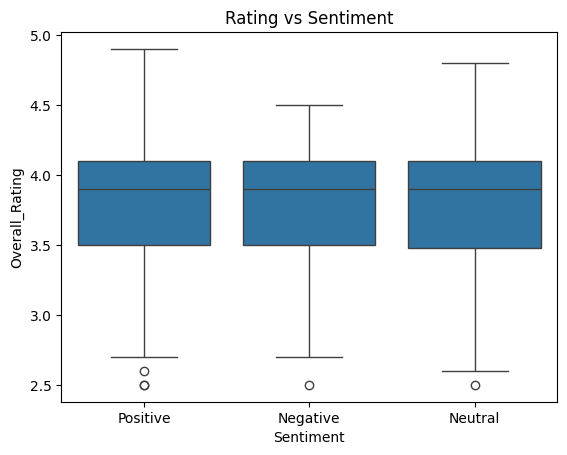

In [21]:
# Example: Sentiment vs Rating
sns.boxplot(x='Sentiment', y='Overall_Rating', data=data_set)
plt.title('Rating vs Sentiment')
plt.show()


## 🎨 Step 5: Visualizations
- Word clouds by sentiment category.

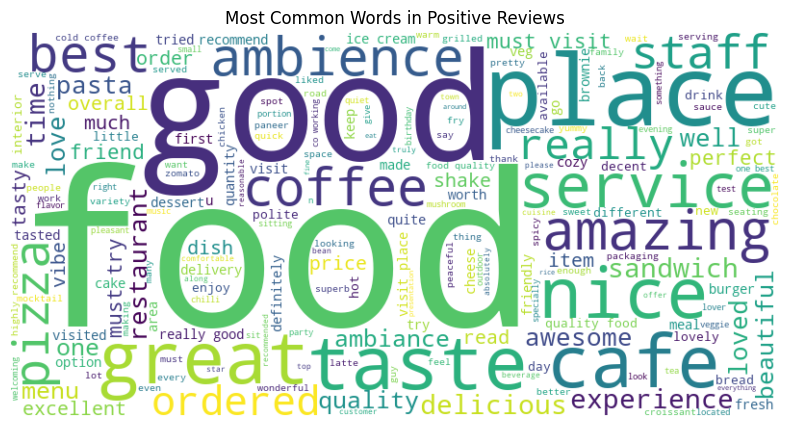

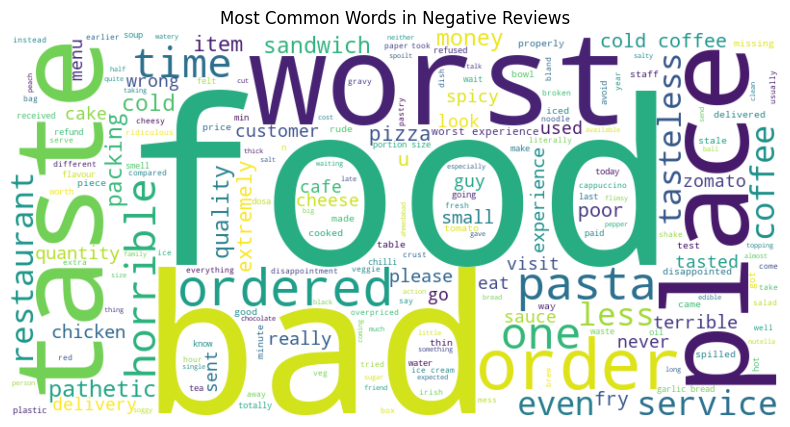

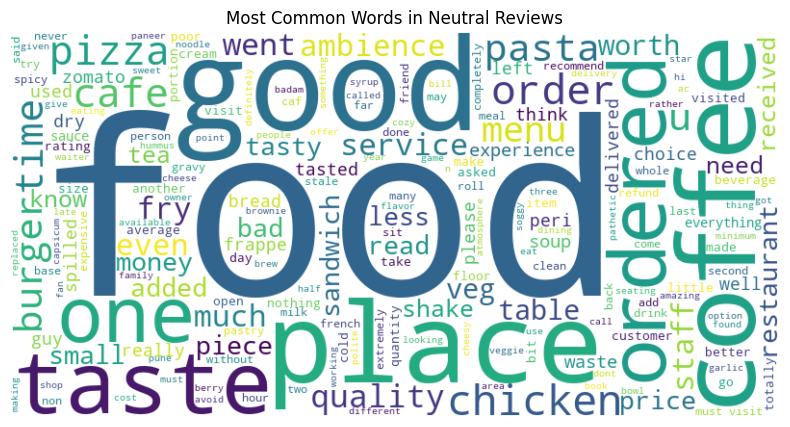

In [22]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(data_set[data_set['Sentiment'] == sentiment]['Clean_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {sentiment} Reviews')
    plt.show()


## ✅ Conclusion
This analysis offers valuable insights into customer satisfaction based on Zomato reviews. Leveraging NLP and sentiment analysis, we can identify areas for improvement and customer preferences.
